<a href="https://colab.research.google.com/github/syedsadabalam/oasisinfobyte/blob/main/UnemploymentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlp
%matplotlib inline
import datetime as dt
import calendar
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px



In [2]:
df = pd.read_csv('/content/drive/MyDrive/ColabNotebook/Unemployment.csv')
df_11_2020 = pd.read_csv('/content/drive/MyDrive/ColabNotebook/Unemployment_11_2020.csv')

In [3]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
df_11_2020

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [5]:
df.shape

(768, 7)

In [6]:
df_11_2020.shape

(267, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [8]:
df_11_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [9]:
#checking null values
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [10]:
df_11_2020.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [11]:
#dropping he null values
df = df.dropna()

In [12]:
#after dropping
df.shape

(740, 7)

In [13]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [14]:
#highest unemployment satate wise
df_11_2020['Region'].value_counts()

Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: Region, dtype: int64

In [15]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [16]:
df_11_2020.columns


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [17]:
df.columns=['States', 'Date', 'Frequency', 'UnemploymentRate',
       'EstimatedEmployed', 'LabourParticipationRate',
       'Area']

In [18]:
df_11_2020.columns=['States', 'Date', 'Frequency', 'UnemploymentRate',
       ' EstimatedEmployed', 'LabourParticipationRate',
       'Region', 'Longitude', 'Latitude']


In [19]:
df.head()

,States,Date,Frequency,UnemploymentRate,EstimatedEmployed,LabourParticipationRate,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [20]:
df_11_2020.head()

,States,Date,Frequency,UnemploymentRate,EstimatedEmployed,LabourParticipationRate,Region,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [21]:
print(df_11_2020['States'].value_counts().idxmin())
print(df_11_2020['States'].value_counts().idxmax())

Sikkim
Andhra Pradesh


In [22]:
#converting date column into datetime
df_11_2020['Date'] = pd.to_datetime(df_11_2020['Date'], dayfirst= True)
#extracting month
df_11_2020['month_no'] = df_11_2020['Date'].dt.month
#map month number to month abbrevaiation
df_11_2020['month'] = df_11_2020['month_no'].apply(lambda x: calendar.month_abbr[x])

In [23]:
df_11_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   States                   267 non-null    object        
 1   Date                     267 non-null    datetime64[ns]
 2   Frequency                267 non-null    object        
 3   UnemploymentRate         267 non-null    float64       
 4    EstimatedEmployed       267 non-null    int64         
 5   LabourParticipationRate  267 non-null    float64       
 6   Region                   267 non-null    object        
 7   Longitude                267 non-null    float64       
 8   Latitude                 267 non-null    float64       
 9   month_no                 267 non-null    int64         
 10  month                    267 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 23.1+ KB


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   States                   740 non-null    object 
 1   Date                     740 non-null    object 
 2   Frequency                740 non-null    object 
 3   UnemploymentRate         740 non-null    float64
 4   EstimatedEmployed        740 non-null    float64
 5   LabourParticipationRate  740 non-null    float64
 6   Area                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [25]:
#let's do again for another data set
df['Date'] = pd.to_datetime(df['Date'], dayfirst= True)
df['month_no'] = df['Date'].dt.month
df['month'] = df['month_no'].apply(lambda x: calendar.month_abbr[x])

In [26]:
df.head()

,States,Date,Frequency,UnemploymentRate,EstimatedEmployed,LabourParticipationRate,Area,month_no,month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,Jul
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,Aug
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,Sep


In [27]:
#removing unwanted columns
df.drop(columns=['Frequency','month_no'])

,States,Date,UnemploymentRate,EstimatedEmployed,LabourParticipationRate,Area,month
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural,May
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural,Jun
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural,Jul
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural,Aug
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural,Sep
...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,7.55,10871168.0,44.09,Urban,Feb
750,West Bengal,2020-03-31,6.67,10806105.0,43.34,Urban,Mar
751,West Bengal,2020-04-30,15.63,9299466.0,41.20,Urban,Apr
752,West Bengal,2020-05-31,15.22,9240903.0,40.67,Urban,May


In [28]:
#again remove for another dataset
df_11_2020.drop(columns=['Frequency','month_no'])

,States,Date,UnemploymentRate,EstimatedEmployed,LabourParticipationRate,Region,Longitude,Latitude,month
0,Andhra Pradesh,2020-01-31,5.48,16635535,41.02,South,15.9129,79.740,Jan
1,Andhra Pradesh,2020-02-29,5.83,16545652,40.90,South,15.9129,79.740,Feb
2,Andhra Pradesh,2020-03-31,5.79,15881197,39.18,South,15.9129,79.740,Mar
3,Andhra Pradesh,2020-04-30,20.51,11336911,33.10,South,15.9129,79.740,Apr
4,Andhra Pradesh,2020-05-31,17.43,12988845,36.46,South,15.9129,79.740,May
...,...,...,...,...,...,...,...,...,...
262,West Bengal,2020-06-30,7.29,30726310,40.39,East,22.9868,87.855,Jun
263,West Bengal,2020-07-31,6.83,35372506,46.17,East,22.9868,87.855,Jul
264,West Bengal,2020-08-31,14.87,33298644,47.48,East,22.9868,87.855,Aug
265,West Bengal,2020-09-30,9.35,35707239,47.73,East,22.9868,87.855,Sep


In [29]:
top_states=df.sort_values(by='UnemploymentRate',ascending=False)

#keep only states & UnemploymentRate columns and removing duplicat states
top_states = top_states[['States', 'UnemploymentRate']].drop_duplicates(subset='States')

#taking only top 10 states with Unemployment
top_10_states=top_states.head(10)
top_10_states[['States','UnemploymentRate']]

,States,UnemploymentRate
627,Puducherry,76.74
531,Jharkhand,70.17
412,Bihar,58.77
287,Tamil Nadu,53.19
507,Himachal Pradesh,50.00
492,Haryana,46.89
453,Delhi,45.78
315,Tripura,43.64
255,Punjab,40.59
573,Madhya Pradesh,40.49


In [30]:
#reset the index to read more readable
top_10_states.reset_index(drop=True, inplace=True)
#lets'see again
top_10_states[['States','UnemploymentRate']]

,States,UnemploymentRate
0,Puducherry,76.74
1,Jharkhand,70.17
2,Bihar,58.77
3,Tamil Nadu,53.19
4,Himachal Pradesh,50.00
5,Haryana,46.89
6,Delhi,45.78
7,Tripura,43.64
8,Punjab,40.59
9,Madhya Pradesh,40.49


In [31]:
df_states=df[['States','UnemploymentRate']].groupby('States').sum().sort_values('UnemploymentRate',ascending=False)
df_11_2020_states=df_11_2020[['States','UnemploymentRate']].groupby('States').sum().sort_values('UnemploymentRate',ascending=False)

In [32]:
df_states.head(10)

,UnemploymentRate
States,
Tripura,793.81
Haryana,735.93
Jharkhand,576.38
Bihar,529.71
Himachal Pradesh,519.13
Delhi,461.87
Rajasthan,393.63
Uttar Pradesh,351.44
Jammu & Kashmir,339.96


In [33]:
df_11_2020_states.head(10)

,UnemploymentRate
States,
Haryana,274.77
Tripura,250.55
Jharkhand,195.39
Bihar,194.71
Delhi,184.14
Puducherry,179.42
Himachal Pradesh,160.65
Rajasthan,158.68
Jammu & Kashmir,148.30


In [34]:
df_month=df[['month','UnemploymentRate']].groupby('month').sum().sort_values('UnemploymentRate',ascending=False)
df_11_2020_month=df[['month','UnemploymentRate']].groupby('month').sum().sort_values('UnemploymentRate',ascending=False)
df_11_2020_month.head(10)

,UnemploymentRate
month,
May,1747.85
Apr,1205.72
Jun,1097.56
Mar,556.43
Oct,544.55
Nov,542.76
Feb,528.13
Jan,527.39
Aug,510.81


In [35]:
df_month.head(10)

,UnemploymentRate
month,
May,1747.85
Apr,1205.72
Jun,1097.56
Mar,556.43
Oct,544.55
Nov,542.76
Feb,528.13
Jan,527.39
Aug,510.81


In [36]:
df_est_emp=df[['month','EstimatedEmployed']].groupby('month').sum().sort_values('EstimatedEmployed',ascending=False)
df_est_emp

,EstimatedEmployed
month,
Jun,766717078.0
May,699995530.0
Jan,406899254.0
Feb,403011803.0
Sep,402452126.0
Oct,401411032.0
Nov,400051335.0
Jul,399838967.0
Aug,399610205.0


Text(0, 0.5, 'UNEMPLOYED PEOPLE (%)')

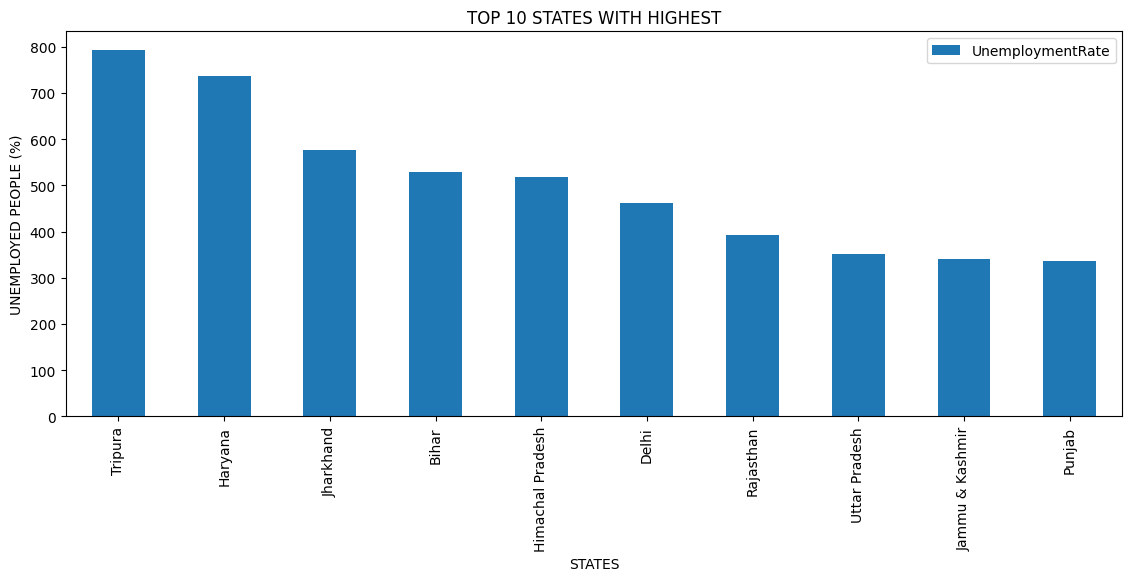

In [37]:
fig=plt.figure()
a=fig.add_subplot(1,2,1)
df_states[:10].plot(kind='bar',figsize=(30,5),ax=a)
a.set_title('TOP 10 STATES WITH HIGHEST')
a.set_xlabel('STATES')
a.set_ylabel('UNEMPLOYED PEOPLE (%)')

Text(0, 0.5, 'UNEMPLOYED PEOPLE (%)')

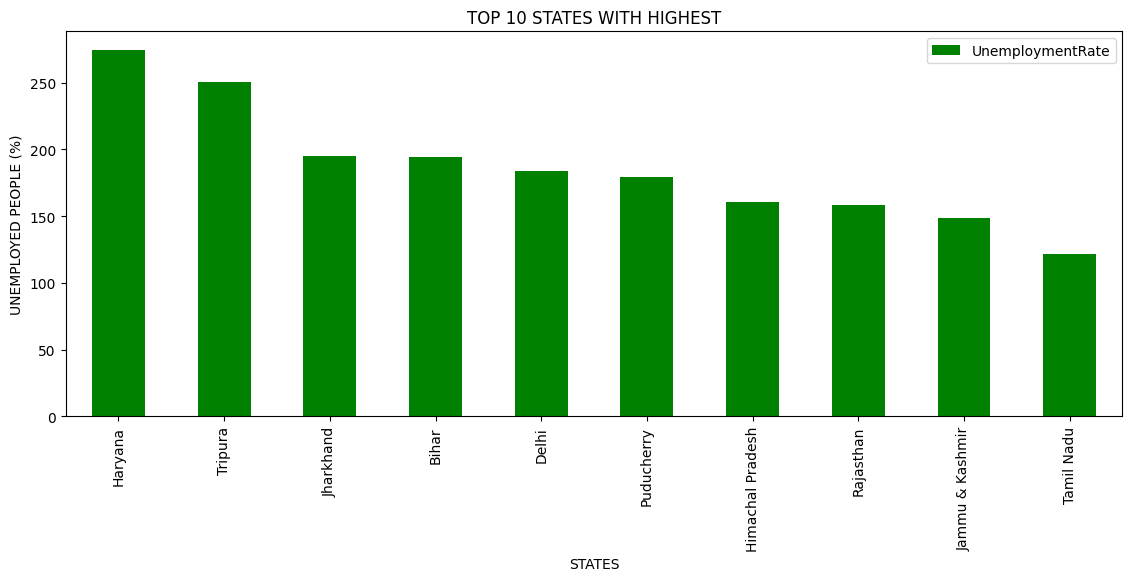

In [38]:
fig=plt.figure()
a=fig.add_subplot(1,2,1)
df_11_2020_states[:10].plot(kind='bar',color='green', figsize=(30,5),ax=a)
a.set_title('TOP 10 STATES WITH HIGHEST')
a.set_xlabel('STATES')
a.set_ylabel('UNEMPLOYED PEOPLE (%)')

Text(0, 0.5, 'UNEMPLOYED PEOPLE (%)')

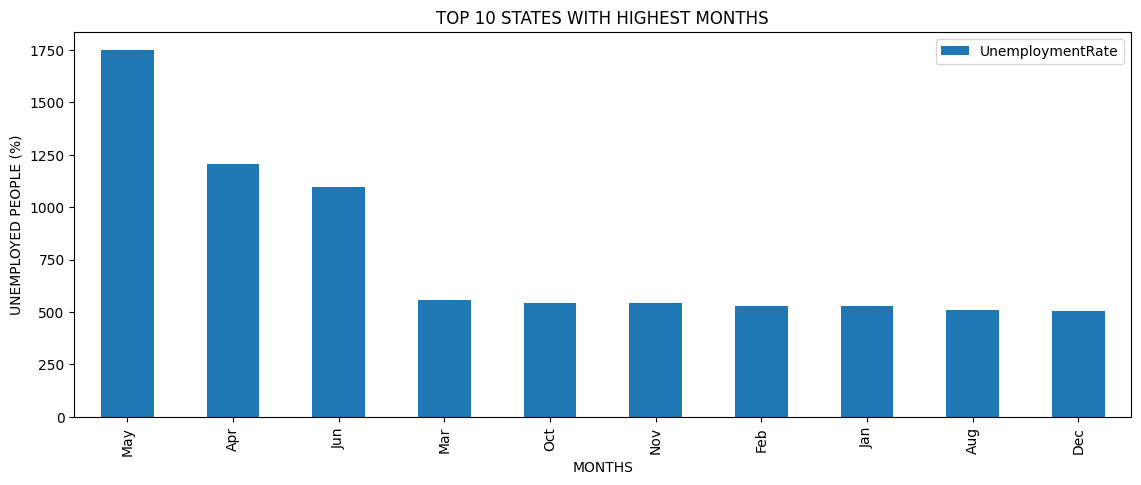

In [39]:
fig=plt.figure()
a=fig.add_subplot(1,2,1)
df_month[:10].plot(kind='bar',figsize=(30,5),ax=a)
a.set_title('TOP 10 STATES WITH HIGHEST MONTHS')
a.set_xlabel('MONTHS')
a.set_ylabel('UNEMPLOYED PEOPLE (%)')

Text(0, 0.5, 'UNEMPLOYED PEOPLE (%)')

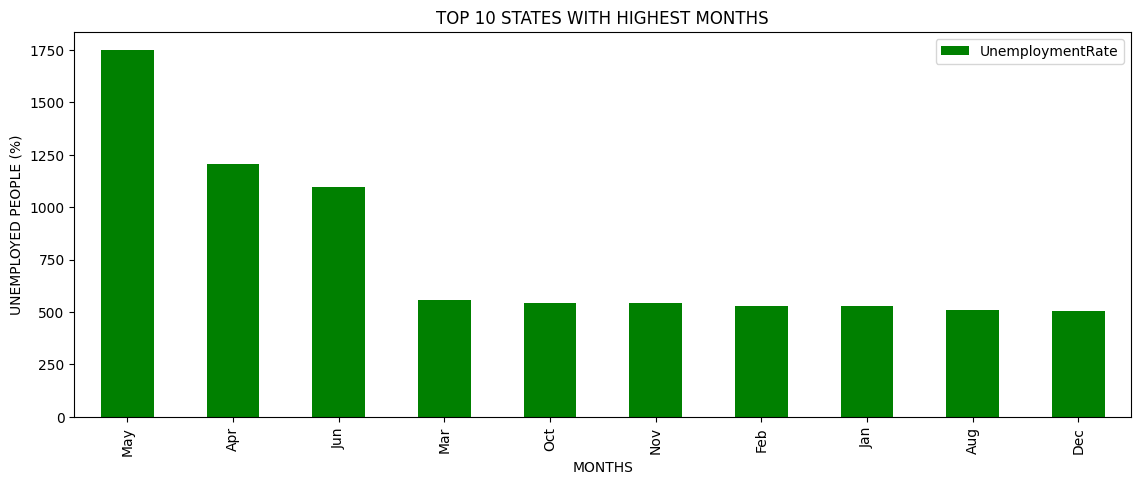

In [40]:
fig=plt.figure()
a=fig.add_subplot(1,2,1)
df_11_2020_month[:10].plot(kind='bar',color='green',figsize=(30,5),ax=a)
a.set_title('TOP 10 STATES WITH HIGHEST MONTHS')
a.set_xlabel('MONTHS')
a.set_ylabel('UNEMPLOYED PEOPLE (%)')

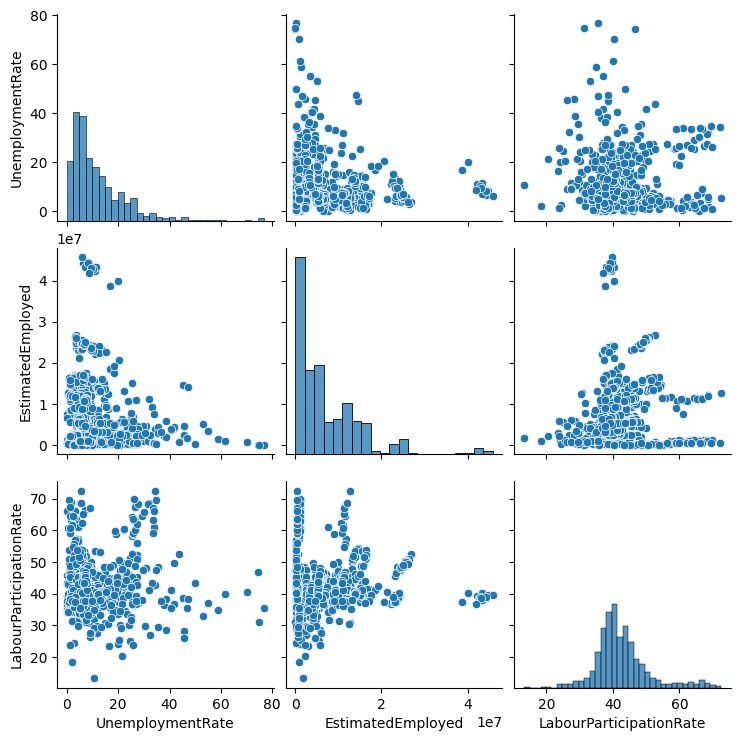

In [41]:
sns.pairplot(df.drop(columns=['Frequency','month_no']))

In [42]:
unemp_11_2020 = df_11_2020[['States','Region','UnemploymentRate']]
figure = px.sunburst(unemp_11_2020,
                     title= 'Unemployement Rate In India',
                     path=['Region','States'],
                     values='UnemploymentRate',
                     width=800,
                     height=800,)
figure.show()

In [43]:
#the chart is set to Unemployment Rate states.
fig = px.bar(df,
             x='States',
             y='UnemploymentRate',
             animation_frame='month',
             color='States',
             title='Unemployment Rate (states)')

fig.update_layout(xaxis={'categoryorder': 'total descending'})

#the duration of each frame in the animation to 2 seconds
#the buttons in the update menu and changes the frame duration.
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 2000

fig.show()